# **Batch GD**

In [45]:
import numpy as np
import pandas as pd
import time

In [46]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [47]:
df = df[['Age','EstimatedSalary','Purchased']]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [48]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [50]:
# print(X_scaled)
print(X_scaled.shape)

(400, 2)


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [52]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [53]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                30        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=400,batch_size=320,validation_split=0.2)
print('time taken by batch gd: ',time.time() - start)

Epoch 1/400
1/1 [==============================] - 1s 1s/step - loss: 0.6735 - accuracy: 0.6000 - val_loss: 0.7001 - val_accuracy: 0.5250
Epoch 2/400
1/1 [==============================] - 0s 41ms/step - loss: 0.6652 - accuracy: 0.6969 - val_loss: 0.6976 - val_accuracy: 0.5500
Epoch 3/400
1/1 [==============================] - 0s 41ms/step - loss: 0.6592 - accuracy: 0.7063 - val_loss: 0.6956 - val_accuracy: 0.5625
Epoch 4/400
1/1 [==============================] - 0s 43ms/step - loss: 0.6542 - accuracy: 0.7156 - val_loss: 0.6938 - val_accuracy: 0.5625
Epoch 5/400
1/1 [==============================] - 0s 63ms/step - loss: 0.6498 - accuracy: 0.7188 - val_loss: 0.6923 - val_accuracy: 0.5625
Epoch 6/400
1/1 [==============================] - 0s 46ms/step - loss: 0.6456 - accuracy: 0.7188 - val_loss: 0.6908 - val_accuracy: 0.5750
Epoch 7/400
1/1 [==============================] - 0s 62ms/step - loss: 0.6417 - accuracy: 0.7250 - val_loss: 0.6895 - val_accuracy: 0.5750
Epoch 8/400
1/1 [=====

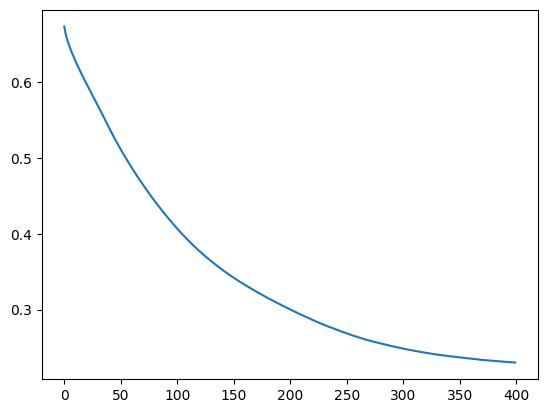

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

*Above you see there is smooth curve in reducing loss there is no jaggerness means it reduce the loss in very stable way as compared to stochastic GD*

# **Stochastic GD**

In [59]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                30        
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=400,batch_size=1,validation_split=0.2)
print('time taken by stochastic gd: ',time.time() - start)

Epoch 1/400
320/320 [==============================] - 3s 2ms/step - loss: 0.5140 - accuracy: 0.8250 - val_loss: 0.6224 - val_accuracy: 0.6625
Epoch 2/400
320/320 [==============================] - 1s 2ms/step - loss: 0.3760 - accuracy: 0.8469 - val_loss: 0.5689 - val_accuracy: 0.6750
Epoch 3/400
320/320 [==============================] - 1s 2ms/step - loss: 0.3319 - accuracy: 0.8500 - val_loss: 0.4994 - val_accuracy: 0.7250
Epoch 4/400
320/320 [==============================] - 1s 2ms/step - loss: 0.3162 - accuracy: 0.8469 - val_loss: 0.4534 - val_accuracy: 0.7500
Epoch 5/400
320/320 [==============================] - 1s 3ms/step - loss: 0.3084 - accuracy: 0.8562 - val_loss: 0.4172 - val_accuracy: 0.7500
Epoch 6/400
320/320 [==============================] - 1s 3ms/step - loss: 0.3071 - accuracy: 0.8594 - val_loss: 0.3785 - val_accuracy: 0.8000
Epoch 7/400
320/320 [==============================] - 1s 2ms/step - loss: 0.3006 - accuracy: 0.8656 - val_loss: 0.3474 - val_accuracy: 0.8125

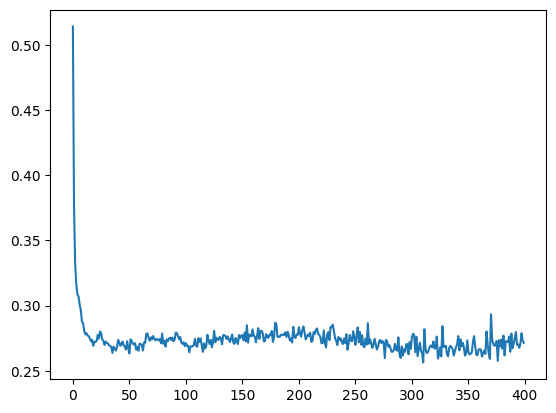

In [63]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

*Above you see there is jaggerness in reducing loss means it reduce the loss in very unstable way as compared to batch GD*

### SGD is best for non-convex problem while BGD is suitable for convex problem